<a href="https://colab.research.google.com/github/simonme42/ANN_experiments/blob/master/ANN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN from scratch

*   In this notebook, we implement an artificial neural network from scratch.
*   All we need are a few standard python libraries
*   At the end we´ll test our ANN implementation on image classification and regression tasks






In [1]:
!git clone https://github.com/simonme42/ANN_experiments.git

Cloning into 'ANN_experiments'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 102 (delta 49), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (102/102), 5.03 MiB | 3.49 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [0]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
import math
from ANN_experiments import ANN

%matplotlib inline


# Now we train and test our NN on binary image classification using cat vs noncat



In [0]:
def load_data():
  train_dataset = h5py.File("ANN_experiments/datasets/train_catvnoncat.h5", "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File("ANN_experiments/datasets/test_catvnoncat.h5", "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Cost after epoch 0: 0.652132
Cost after epoch 100: 0.377799
Cost after epoch 200: 0.187737
Cost after epoch 300: 0.208676
Cost after epoch 400: 0.027542
Cost after epoch 500: 0.014108
Cost after epoch 600: 0.005085
Cost after epoch 700: 0.003023
Cost after epoch 800: 0.002043
Cost after epoch 900: 0.001524
0.0012072630094577229


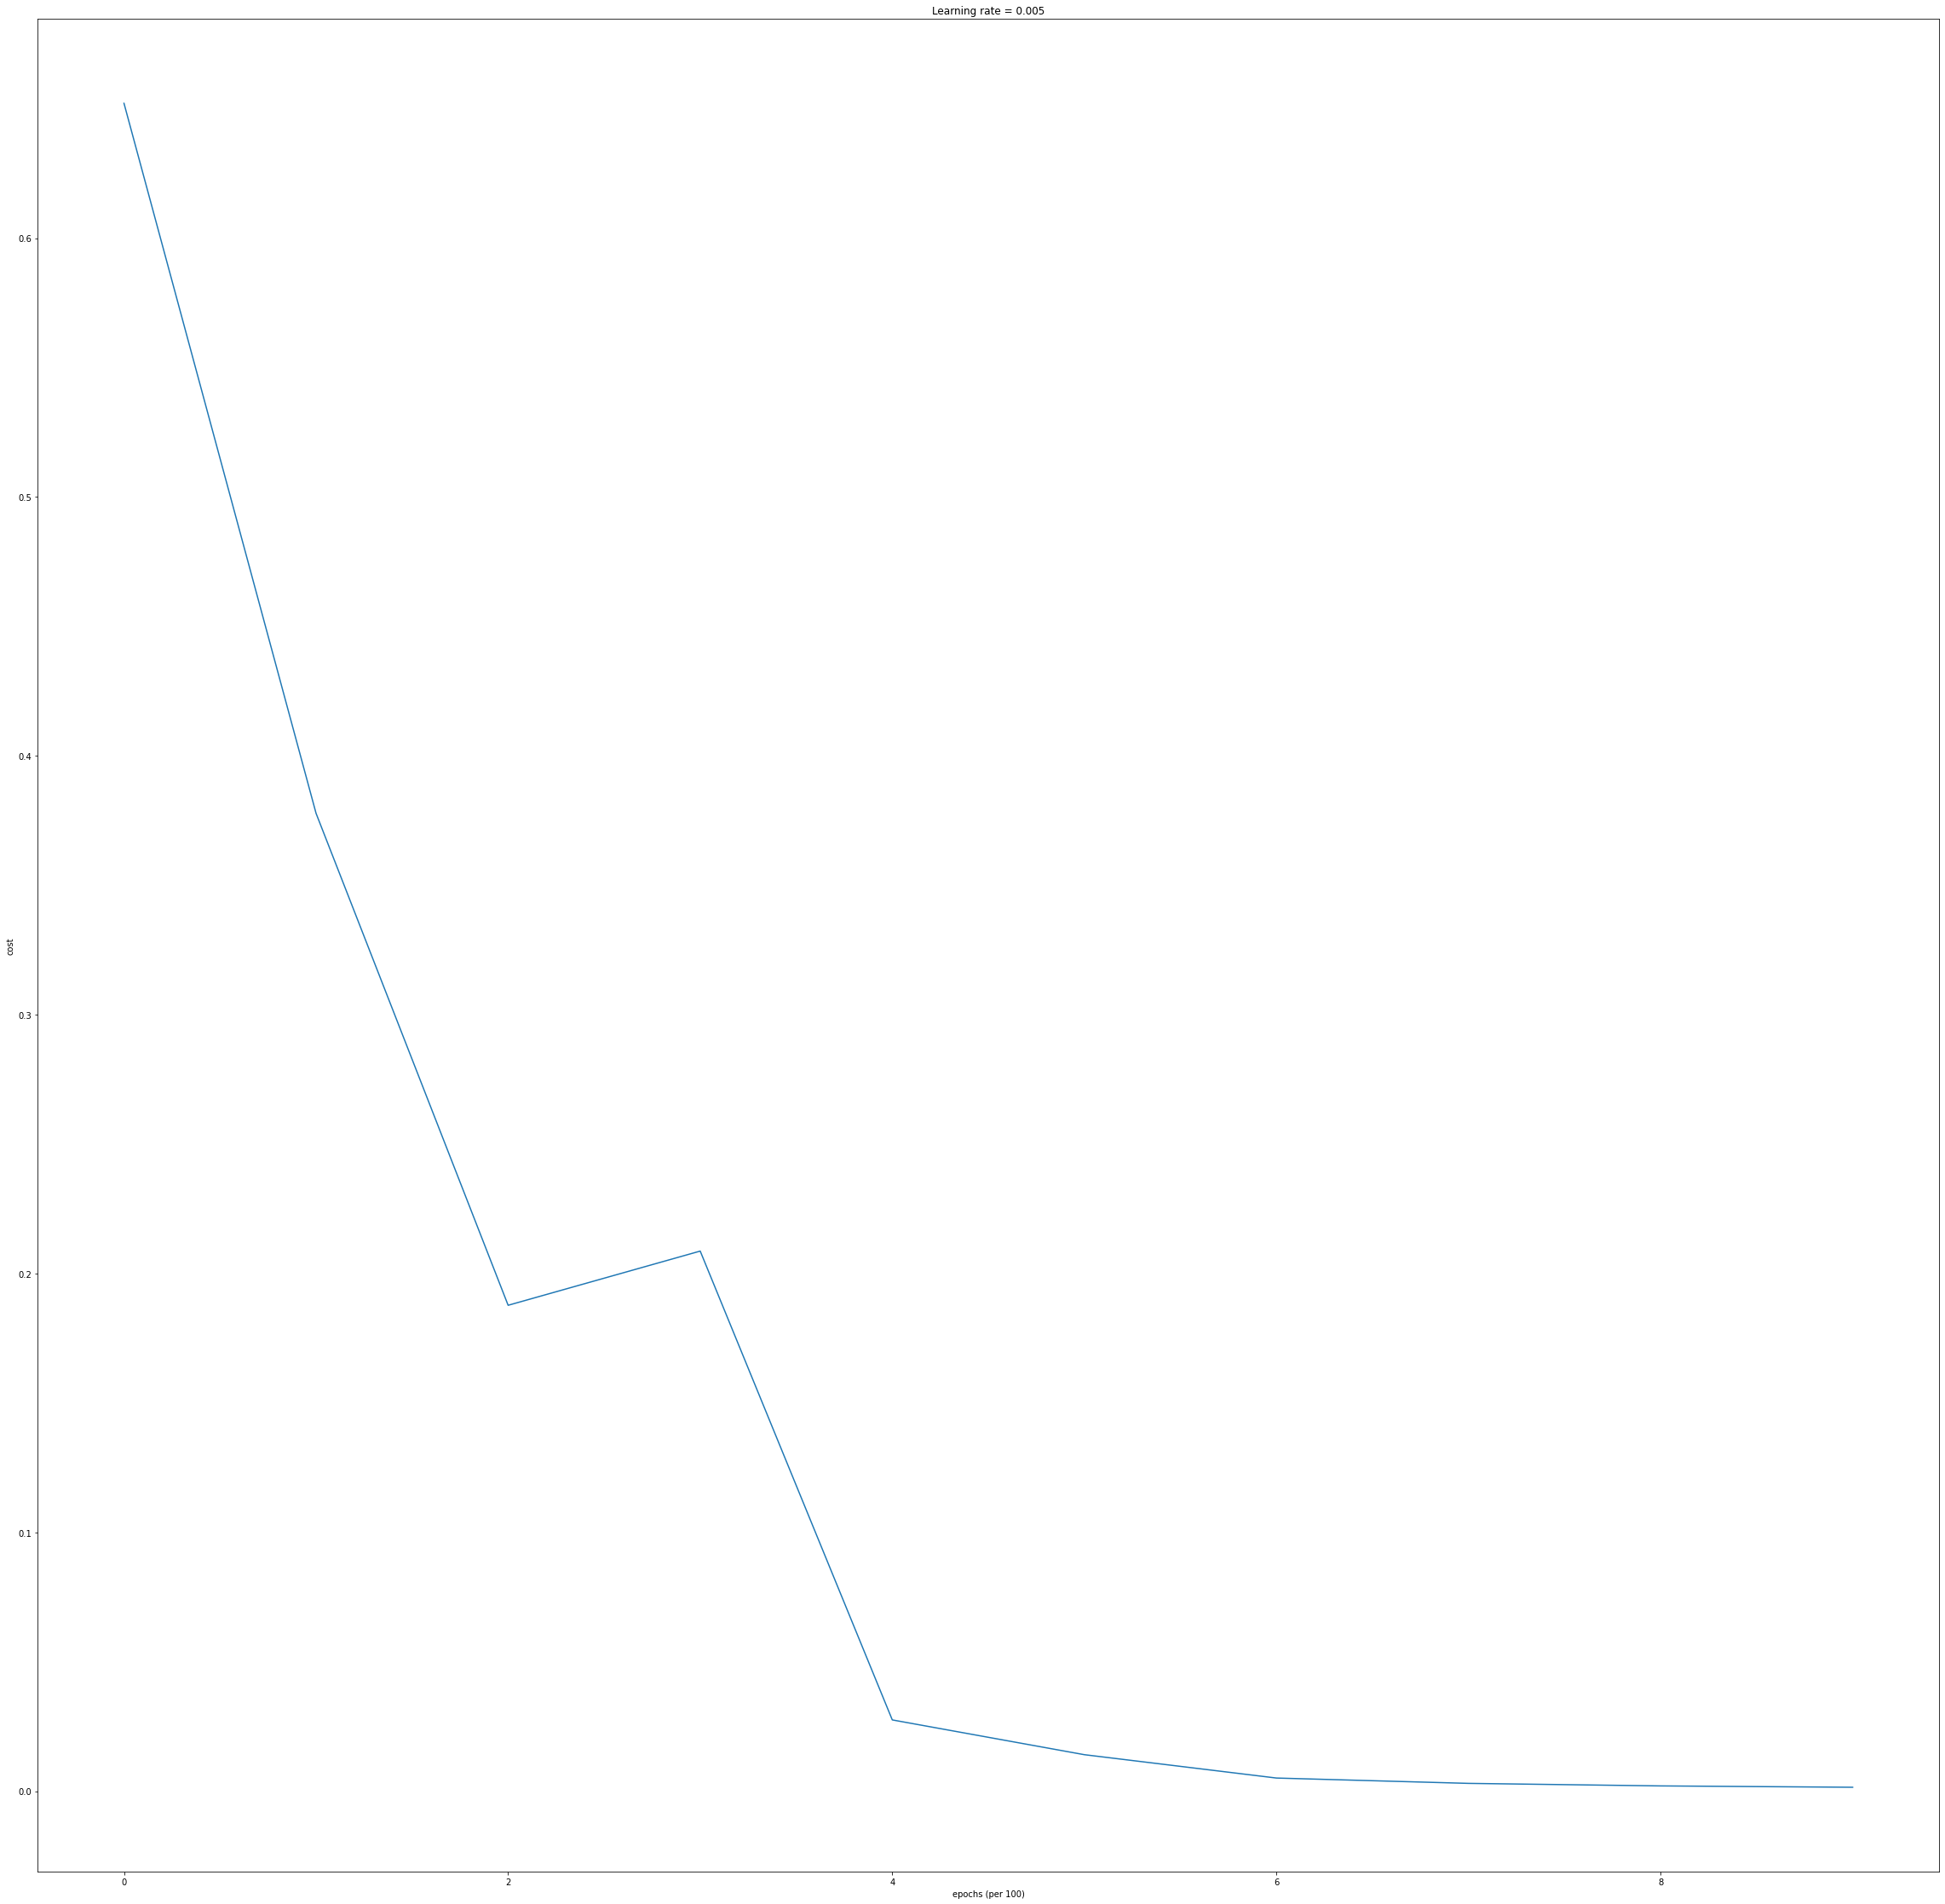

In [13]:
layers_dims = [train_x.shape[0], 30, 20, 10, 1]

parameters = ANN.train_model(train_x, train_y, layers_dims, learning_rate = 0.005, num_epochs = 1000, print_cost=True, loss="crossentropy", optimizer = "GD", decay=False)

In [14]:
pred_train = ANN.predict(train_x, train_y, parameters)
pred_test = ANN.predict(test_x, test_y, parameters)

Accuracy: 0.9999999999999998
Accuracy: 0.7


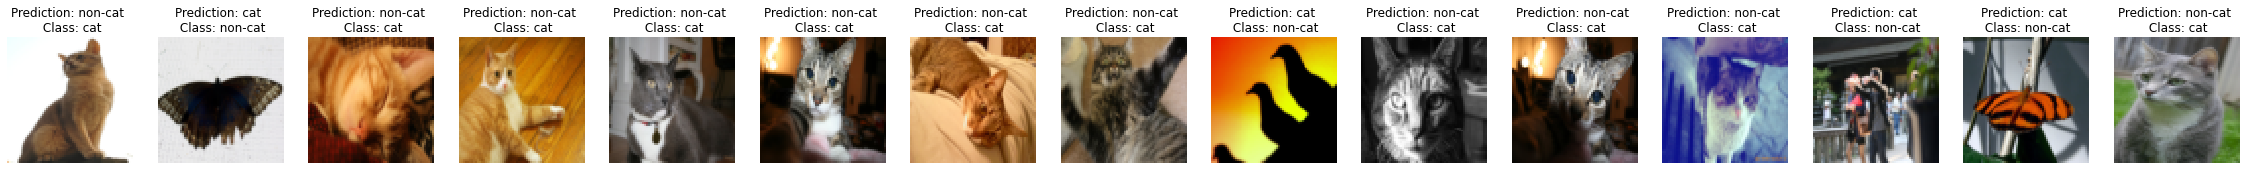

In [15]:
ANN.print_mislabeled_images(classes, test_x, test_y, pred_test)

## Now we use our NN implementation for a Regression task (adding 2 numbers)

In [0]:
def create_mse_data(low, high, m, train_test_split=0.2):

  mse_X = np.random.randint(low,high=high, size=(2,m))
  mse_X_scaled = mse_X/(high)

  mse_Y = (np.copy(mse_X[0,:])+np.copy(mse_X[1,:])).reshape(1,mse_X.shape[1])
  mse_Y_scaled = mse_Y/(high*2)

  mse_X_train = mse_X_scaled[:,0:int(m*train_test_split)]
  mse_X_test = mse_X_scaled[:,int(m*train_test_split):]
  mse_Y_train = mse_Y_scaled[:,0:int(m*train_test_split)]
  mse_Y_test = mse_Y_scaled[:,int(m*train_test_split):]

  return (mse_X_train,mse_X_test,mse_Y_train,mse_Y_test)

(mse_X_train,mse_X_test,mse_Y_train,mse_Y_test) = create_mse_data(0,50,10000)

layers_dims_mse = [mse_X_train.shape[0],20,10,1]

Cost after epoch 0: 0.016924
Cost after epoch 100: 0.000029
Cost after epoch 200: 0.000025
Cost after epoch 300: 0.000026
Cost after epoch 400: 0.000025
2.4099208968803518e-05


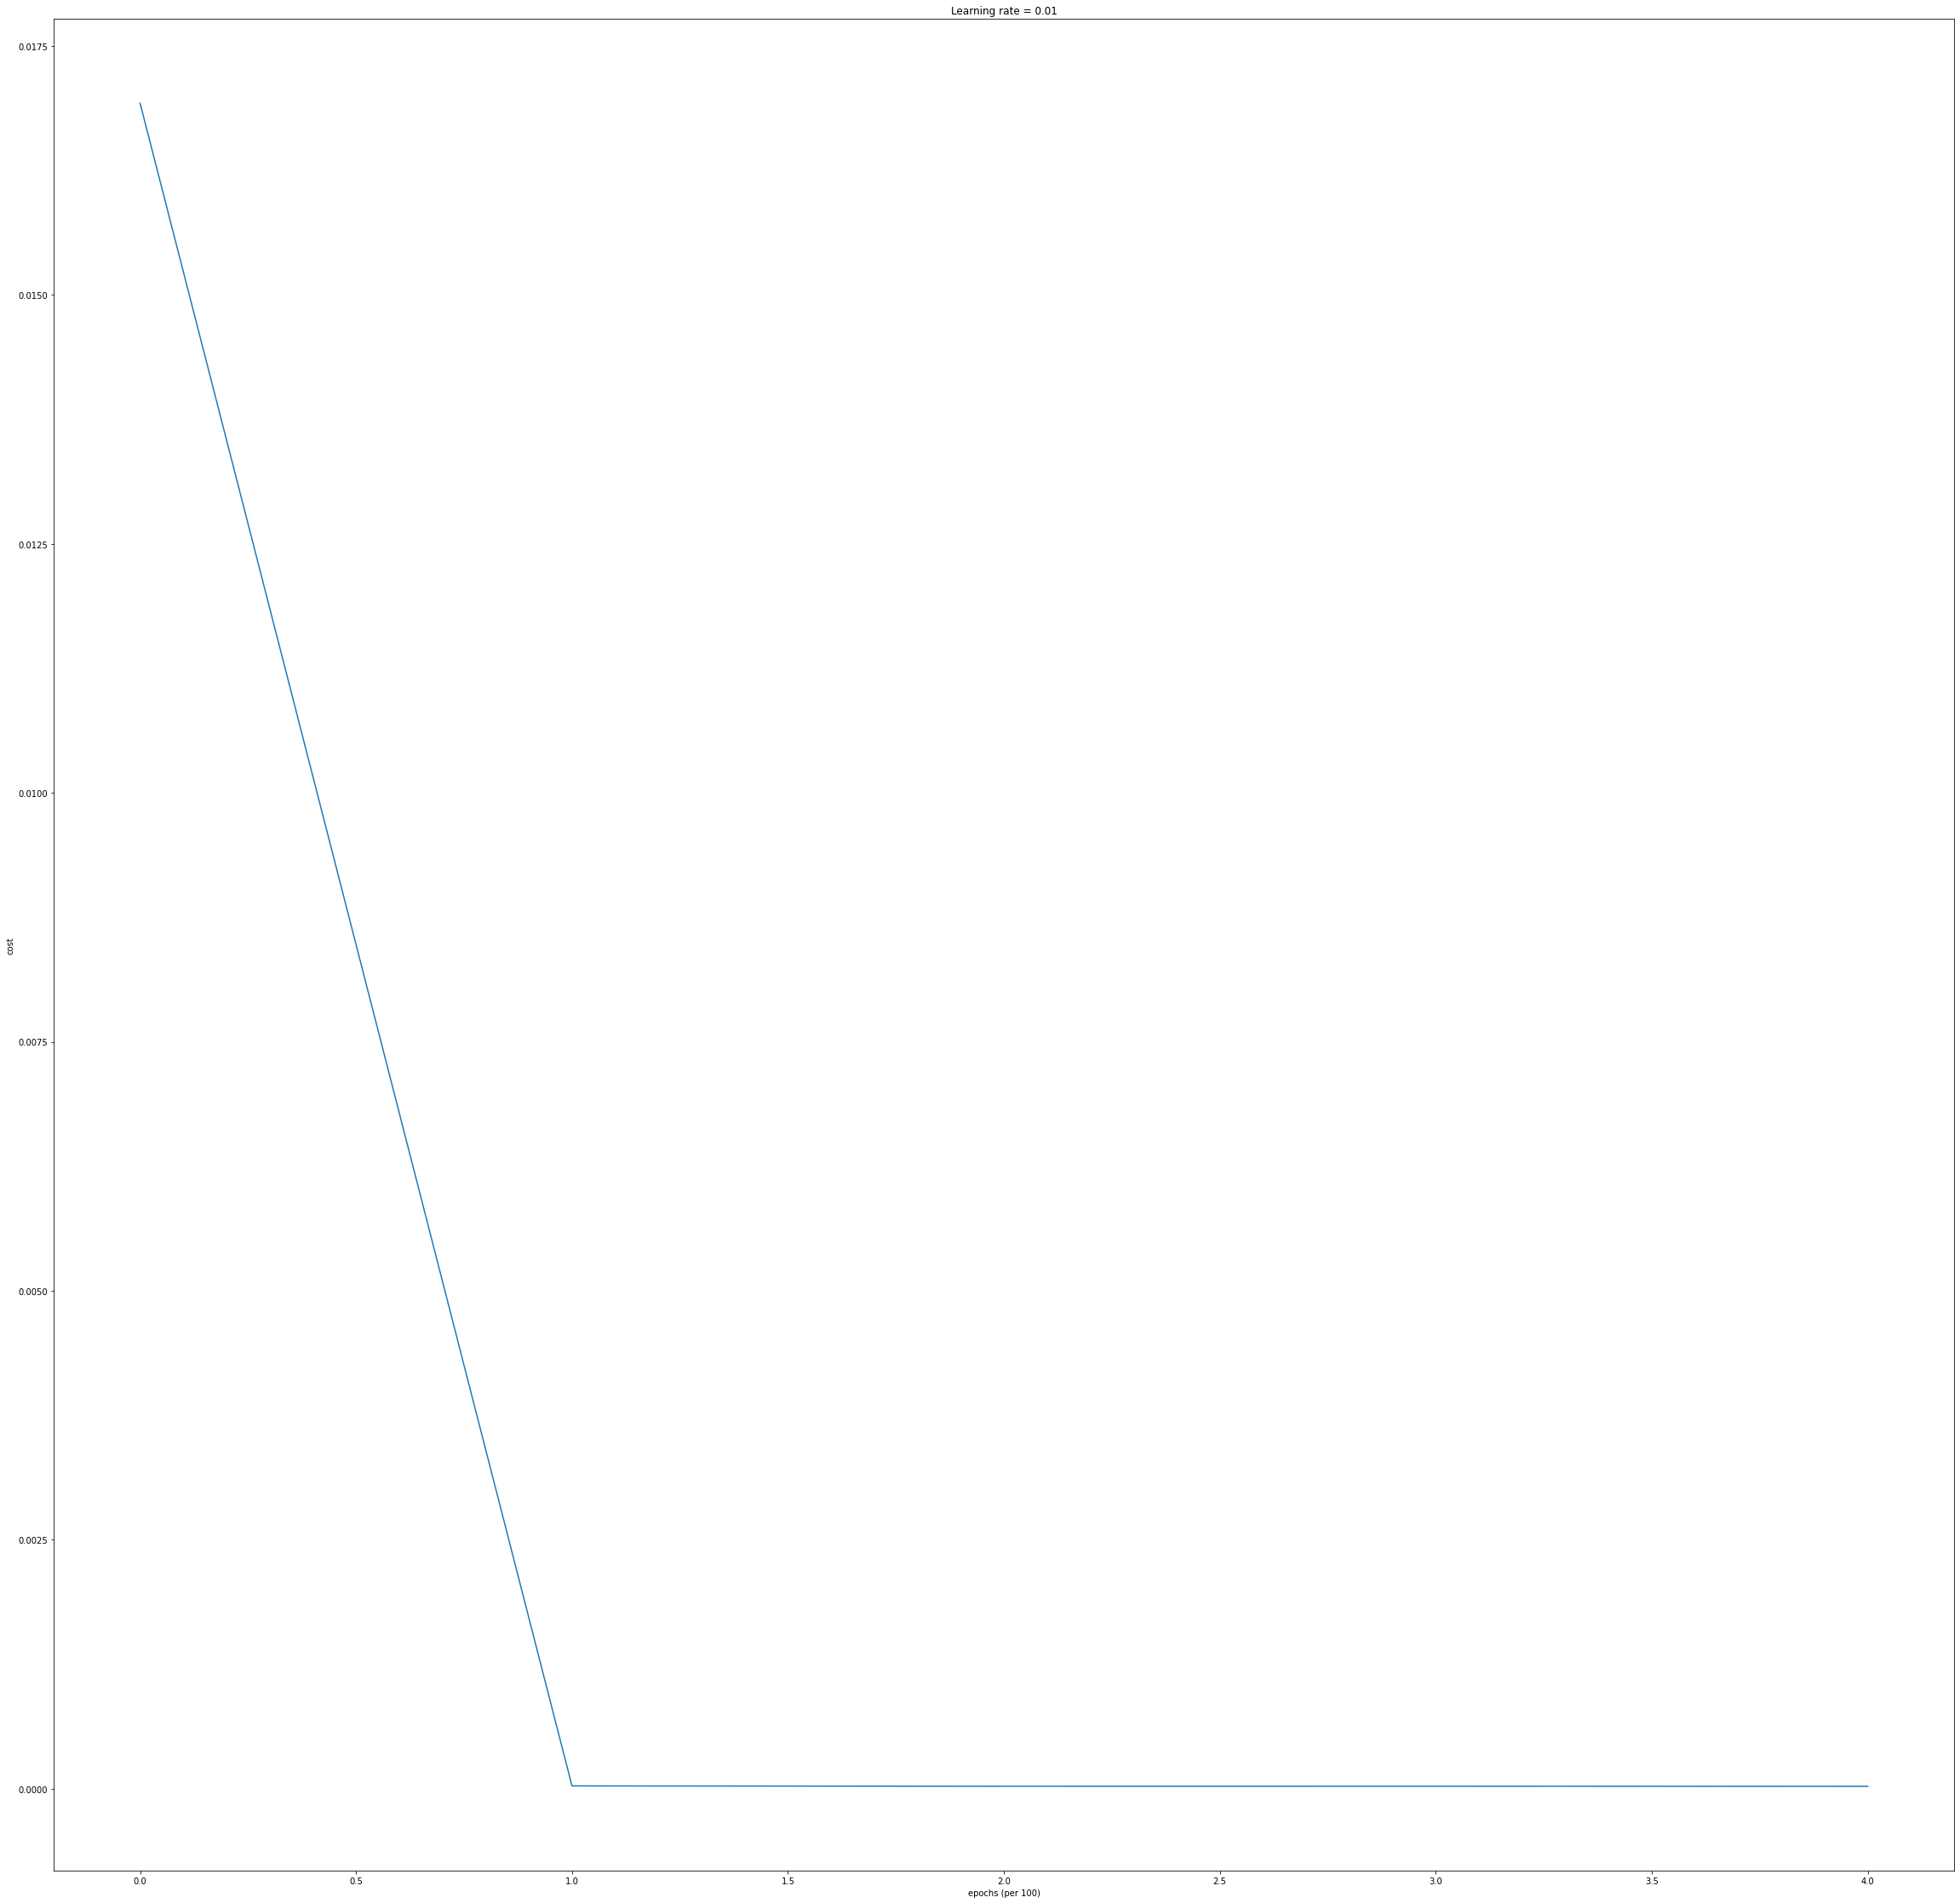

In [65]:
parameters = ANN.train_model(mse_X_train, mse_Y_train, layers_dims_mse, num_epochs = 500, print_cost = True, loss="mse", learning_rate = 0.01, optimizer="Adam", decay_param=0.99)

In [66]:
pred_train = ANN.predict(mse_X_train, mse_Y_train, parameters, loss="mse")

p, caches = ANN.L_model_forward(mse_X_train, parameters)
print((p*100-mse_Y_train*100)[:,0:50])

Accuracy: 0.00019598804057786393
[[-0.54592929 -0.55109839  0.38932255  0.61939007 -0.26271424  0.51188205
  -0.4437425   0.30897695 -0.0190469  -0.12001813 -0.23040738 -0.43240338
  -0.41976218 -0.45771468  0.18509837 -0.42741981  0.10815232 -0.85274091
   0.60306871  0.03176149  0.26564041 -0.20780453 -0.88830746 -0.50179428
  -0.43444537  0.00454455 -0.32527202 -0.36747579  0.26768558  0.0827332
  -0.2452164  -0.18773431  0.49162591  0.2452048   0.3755213  -0.4497368
   0.55564151  0.02785211  0.30024889 -0.49846183 -0.30240612 -0.8447317
  -0.15693944  0.17307743  0.04592595 -0.15322179  0.35324089  0.70290413
   0.57042144  0.26535968]]


In [67]:
pred_test = ANN.predict(mse_X_test, mse_Y_test, parameters, loss="mse")

p, caches = ANN.L_model_forward(mse_X_test, parameters)

for i in range(len((mse_Y_test*100)[:, 0:10][0])):
  print(f"True Sum: {(mse_Y_test*100)[:,i]}")
  print(f"Predicted Sum: {(p*100)[:,i]}")
  print(f"Difference: {(p*100-mse_Y_test*100)[:,i]}\n")


Accuracy: 0.00010476898728742331
True Sum: [80.]
Predicted Sum: [80.40975243]
Difference: [0.40975243]

True Sum: [53.]
Predicted Sum: [53.1325525]
Difference: [0.1325525]

True Sum: [34.]
Predicted Sum: [33.86236483]
Difference: [-0.13763517]

True Sum: [72.]
Predicted Sum: [71.4529623]
Difference: [-0.5470377]

True Sum: [64.]
Predicted Sum: [64.18777627]
Difference: [0.18777627]

True Sum: [22.]
Predicted Sum: [22.18895669]
Difference: [0.18895669]

True Sum: [77.]
Predicted Sum: [76.43737524]
Difference: [-0.56262476]

True Sum: [73.]
Predicted Sum: [72.48654017]
Difference: [-0.51345983]

True Sum: [27.]
Predicted Sum: [27.64680956]
Difference: [0.64680956]

True Sum: [71.]
Predicted Sum: [70.78886611]
Difference: [-0.21113389]



In [41]:
len((mse_Y_test*100)[:, 5:10])

1

In [46]:
(mse_Y_test*100)[:, 0:10][0]

array([40., 43., 44., 38., 86.])

In [39]:
mse_Y_test

array([[0.72, 0.49, 0.87, ..., 0.79, 0.8 , 0.39]])